# Exercício de Classificação e Agrupamento - Titanic e DBSCAN

Aluno: Vinícius Cebalhos


## 1. Importação de Bibliotecas


In [1]:
# Bibliotecas básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Algoritmos de classificação
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier

# Algoritmos de agrupamento
from sklearn.cluster import DBSCAN

# Configurações
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
np.random.seed(42)

print("Bibliotecas importadas com sucesso!")


Bibliotecas importadas com sucesso!


## 2. Carregamento e Preparação dos Dados do Titanic


In [2]:
# Carregar o dataset Titanic
df = pd.read_csv('titanic.csv')

print("Informações do Dataset:")
print(f"Shape: {df.shape}")
print(f"\nColunas: {list(df.columns)}")
print(f"\nTipos de dados:")
print(df.dtypes)
print(f"\nPrimeiras 5 linhas:")
df.head()


Informações do Dataset:
Shape: (887, 8)

Colunas: ['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare']

Tipos de dados:
Survived                     int64
Pclass                       int64
Name                        object
Sex                         object
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object

Primeiras 5 linhas:


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [3]:
# Análise exploratória dos dados
print("Informações sobre valores faltantes:")
print(df.isnull().sum())

print("\nEstatísticas descritivas:")
print(df.describe())

print("\nDistribuição da variável target (Survived):")
print(df['Survived'].value_counts())
print(f"Proporção de sobreviventes: {df['Survived'].mean():.3f}")


Informações sobre valores faltantes:
Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

Estatísticas descritivas:
         Survived      Pclass         Age  Siblings/Spouses Aboard  \
count  887.000000  887.000000  887.000000               887.000000   
mean     0.385569    2.305524   29.471443                 0.525366   
std      0.487004    0.836662   14.121908                 1.104669   
min      0.000000    1.000000    0.420000                 0.000000   
25%      0.000000    2.000000   20.250000                 0.000000   
50%      0.000000    3.000000   28.000000                 0.000000   
75%      1.000000    3.000000   38.000000                 1.000000   
max      1.000000    3.000000   80.000000                 8.000000   

       Parents/Children Aboard       Fare  
count           

In [4]:
# Preparação dos dados para classificação
def prepare_titanic_data(df):
    """
    Prepara os dados do Titanic para classificação
    """
    # Fazer uma cópia do dataframe
    data = df.copy()
    
    # Renomear colunas para facilitar o uso
    data = data.rename(columns={
        'Siblings/Spouses Aboard': 'SibSp',
        'Parents/Children Aboard': 'Parch'
    })
    
    # Preencher valores faltantes
    data['Age'] = data['Age'].fillna(data['Age'].median())
    
    # Codificar variáveis categóricas
    le_sex = LabelEncoder()
    
    data['Sex_encoded'] = le_sex.fit_transform(data['Sex'])
    
    # Selecionar features para o modelo (apenas as disponíveis)
    features = ['Pclass', 'Sex_encoded', 'Age', 'SibSp', 'Parch', 'Fare']
    X = data[features]
    y = data['Survived']
    
    return X, y, le_sex

# Preparar os dados
X, y, le_sex = prepare_titanic_data(df)

print("Features selecionadas:")
print(X.columns.tolist())
print(f"\nShape dos dados: {X.shape}")
print(f"\nValores faltantes após preparação:")
print(X.isnull().sum())


Features selecionadas:
['Pclass', 'Sex_encoded', 'Age', 'SibSp', 'Parch', 'Fare']

Shape dos dados: (887, 6)

Valores faltantes após preparação:
Pclass         0
Sex_encoded    0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64


# PARTE 1 - CLASSIFICAÇÃO

## Questão 1: Árvore de Decisão (70/30 split)


In [5]:
# Divisão dos dados: 70% treino, 30% validação
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Dados de treino: {X_train.shape[0]} amostras")
print(f"Dados de teste: {X_test.shape[0]} amostras")
print(f"Proporção de sobreviventes no treino: {y_train.mean():.3f}")
print(f"Proporção de sobreviventes no teste: {y_test.mean():.3f}")

# Treinar modelo de Árvore de Decisão
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model.fit(X_train, y_train)

# Fazer predições
y_pred = dt_model.predict(X_test)

# Calcular acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAcurácia do modelo de Árvore de Decisão: {accuracy:.4f}")

# Relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))


Dados de treino: 620 amostras
Dados de teste: 267 amostras
Proporção de sobreviventes no treino: 0.385
Proporção de sobreviventes no teste: 0.386

Acurácia do modelo de Árvore de Decisão: 0.8015

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.78      0.94      0.85       164
           1       0.86      0.58      0.69       103

    accuracy                           0.80       267
   macro avg       0.82      0.76      0.77       267
weighted avg       0.81      0.80      0.79       267



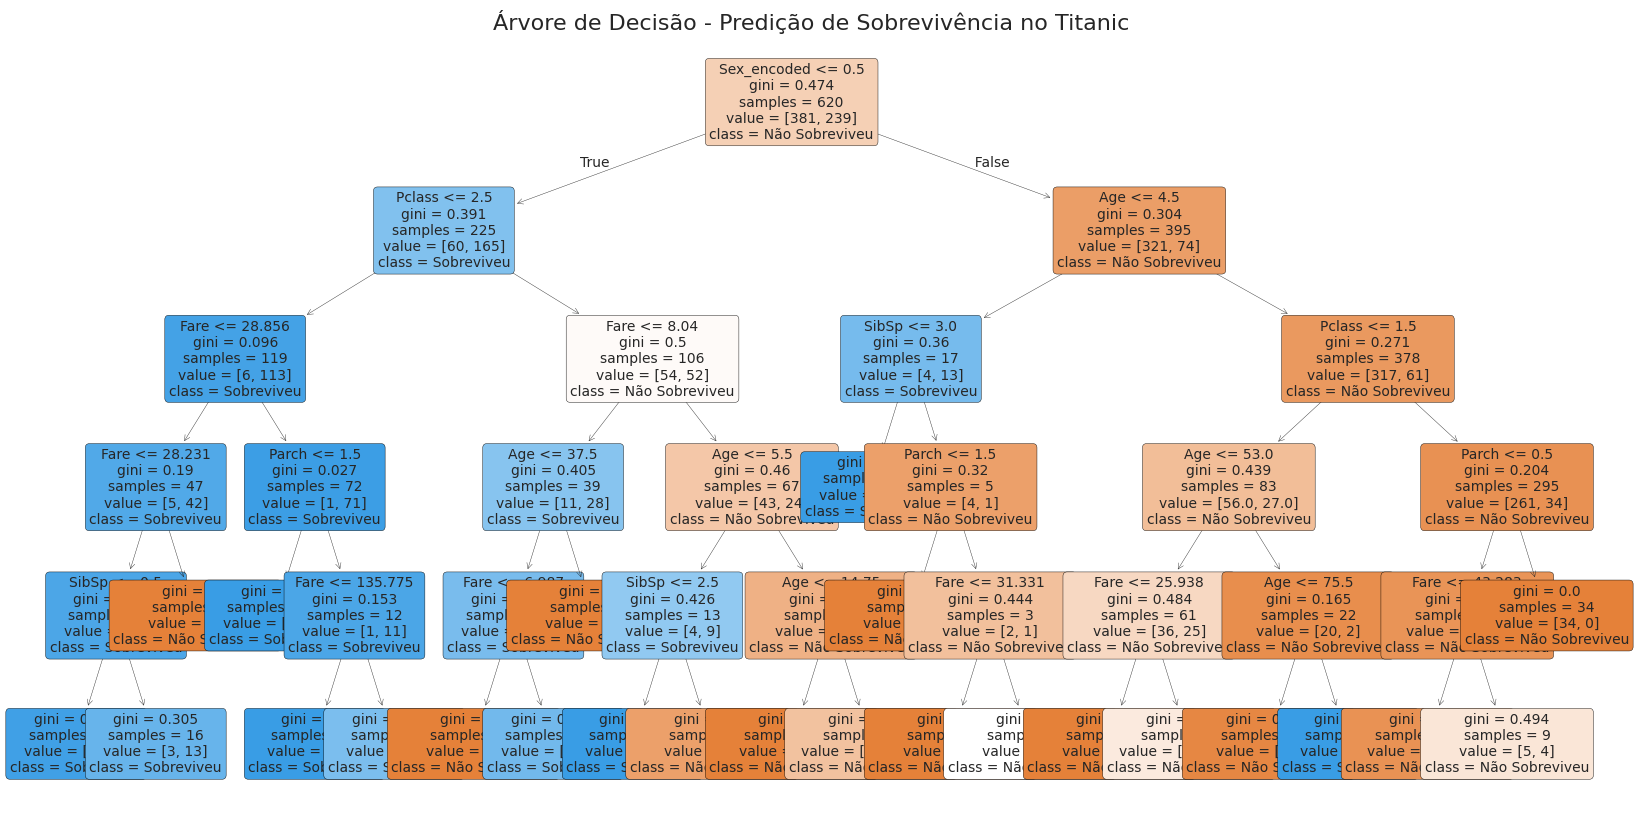

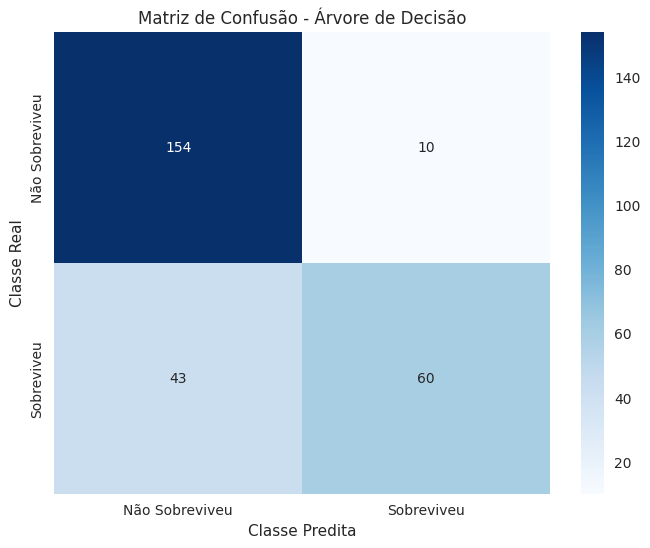

In [6]:
# Visualizar a árvore de decisão
plt.figure(figsize=(20, 10))
plot_tree(dt_model, 
          feature_names=X.columns,
          class_names=['Não Sobreviveu', 'Sobreviveu'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title('Árvore de Decisão - Predição de Sobrevivência no Titanic', fontsize=16)
plt.show()

# Matriz de confusão
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Não Sobreviveu', 'Sobreviveu'],
            yticklabels=['Não Sobreviveu', 'Sobreviveu'])
plt.title('Matriz de Confusão - Árvore de Decisão')
plt.ylabel('Classe Real')
plt.xlabel('Classe Predita')
plt.show()


## Questão 2: Validação Cruzada 10-fold na Árvore de Decisão


Resultados da Validação Cruzada 10-fold:
Scores individuais: [0.80898876 0.86516854 0.7752809  0.88764045 0.85393258 0.80898876
 0.79775281 0.78409091 0.875      0.81818182]
Média dos scores: 0.8275
Desvio padrão: 0.0378
Intervalo de confiança (95%): 0.8275 ± 0.0740


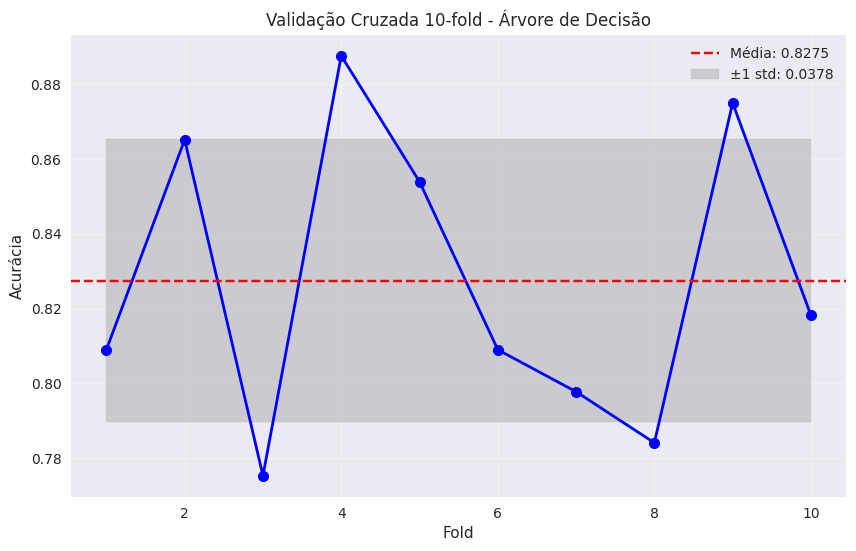


Discussão dos resultados:
• A acurácia média de 0.8275 indica a performance esperada do modelo
• O desvio padrão de 0.0378 mostra a variabilidade entre os folds
• O modelo parece estável, com variação relativamente baixa entre os folds


In [7]:
# Validação cruzada 10-fold
cv_scores = cross_val_score(dt_model, X, y, cv=10, scoring='accuracy')

print("Resultados da Validação Cruzada 10-fold:")
print(f"Scores individuais: {cv_scores}")
print(f"Média dos scores: {cv_scores.mean():.4f}")
print(f"Desvio padrão: {cv_scores.std():.4f}")
print(f"Intervalo de confiança (95%): {cv_scores.mean():.4f} ± {1.96 * cv_scores.std():.4f}")

# Visualizar os scores
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), cv_scores, 'bo-', linewidth=2, markersize=8)
plt.axhline(y=cv_scores.mean(), color='r', linestyle='--', 
           label=f'Média: {cv_scores.mean():.4f}')
plt.fill_between(range(1, 11), 
                cv_scores.mean() - cv_scores.std(),
                cv_scores.mean() + cv_scores.std(),
                alpha=0.3, color='gray', label=f'±1 std: {cv_scores.std():.4f}')
plt.xlabel('Fold')
plt.ylabel('Acurácia')
plt.title('Validação Cruzada 10-fold - Árvore de Decisão')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"\nDiscussão dos resultados:")
print(f"• A acurácia média de {cv_scores.mean():.4f} indica a performance esperada do modelo")
print(f"• O desvio padrão de {cv_scores.std():.4f} mostra a variabilidade entre os folds")
print(f"• O modelo parece estável, com variação relativamente baixa entre os folds")


## Questão 3: k-NN com diferentes valores de k


In [8]:
# Normalizar os dados para k-NN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Testar diferentes valores de k
k_values = [2, 3, 4, 5, 6, 7]
knn_results = {}

print("Testando diferentes valores de k para k-NN:")
print("-" * 50)

for k in k_values:
    # Treinar modelo k-NN
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled, y_train)
    
    # Fazer predições
    y_pred_knn = knn_model.predict(X_test_scaled)
    
    # Calcular acurácia
    accuracy_knn = accuracy_score(y_test, y_pred_knn)
    knn_results[k] = accuracy_knn
    
    print(f"k = {k}: Acurácia = {accuracy_knn:.4f}")

# Encontrar melhor k
best_k = max(knn_results, key=knn_results.get)
best_accuracy = knn_results[best_k]

print(f"\nMelhor valor de k: {best_k} com acurácia de {best_accuracy:.4f}")

# Comparar com Árvore de Decisão
print(f"\nComparação com Árvore de Decisão:")
print(f"Árvore de Decisão: {accuracy:.4f}")
print(f"Melhor k-NN (k={best_k}): {best_accuracy:.4f}")
print(f"Diferença: {abs(accuracy - best_accuracy):.4f}")

if best_accuracy > accuracy:
    print("✓ k-NN foi melhor que a Árvore de Decisão")
else:
    print("✗ Árvore de Decisão foi melhor que k-NN")


Testando diferentes valores de k para k-NN:
--------------------------------------------------
k = 2: Acurácia = 0.8090
k = 3: Acurácia = 0.7865
k = 4: Acurácia = 0.7903
k = 5: Acurácia = 0.7903
k = 6: Acurácia = 0.7940
k = 7: Acurácia = 0.7978

Melhor valor de k: 2 com acurácia de 0.8090

Comparação com Árvore de Decisão:
Árvore de Decisão: 0.8015
Melhor k-NN (k=2): 0.8090
Diferença: 0.0075
✓ k-NN foi melhor que a Árvore de Decisão


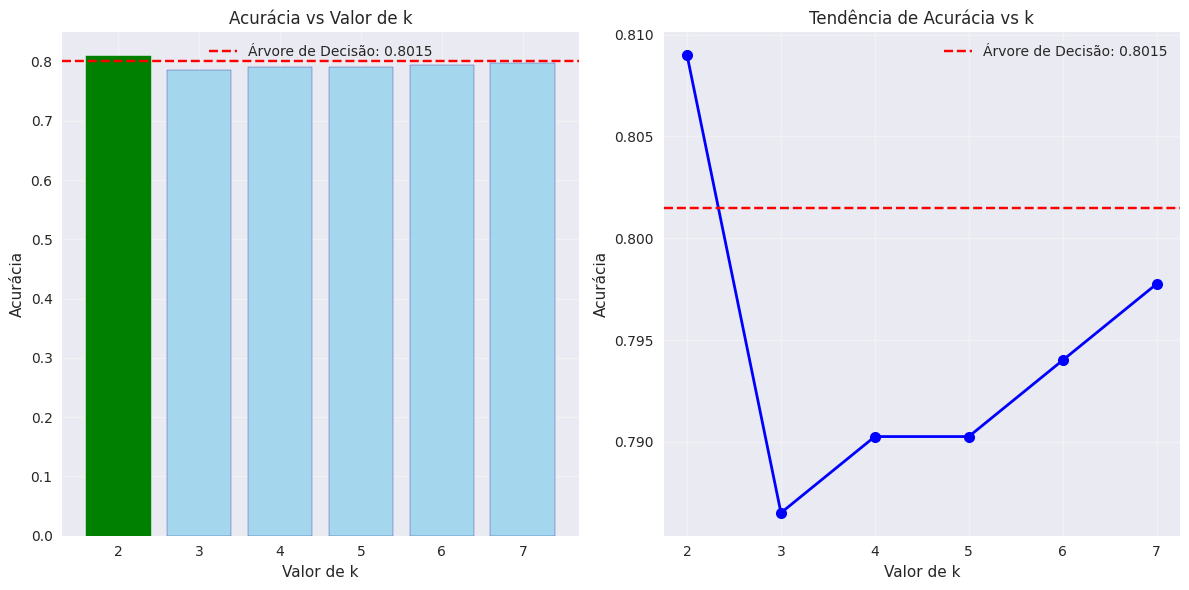


Análise da variação:
Variação entre os modelos k-NN: 0.0225
Desvio padrão: 0.0073
⚠ Variação moderada - alguns modelos diferem


In [9]:
# Visualizar variação dos resultados k-NN
plt.figure(figsize=(12, 6))

# Gráfico de barras
plt.subplot(1, 2, 1)
bars = plt.bar(k_values, [knn_results[k] for k in k_values], 
               color='skyblue', edgecolor='navy', alpha=0.7)
plt.axhline(y=accuracy, color='red', linestyle='--', 
           label=f'Árvore de Decisão: {accuracy:.4f}')
plt.xlabel('Valor de k')
plt.ylabel('Acurácia')
plt.title('Acurácia vs Valor de k')
plt.legend()
plt.grid(True, alpha=0.3)

# Destacar melhor resultado
best_bar = bars[k_values.index(best_k)]
best_bar.set_color('green')
best_bar.set_alpha(1.0)

# Gráfico de linha
plt.subplot(1, 2, 2)
plt.plot(k_values, [knn_results[k] for k in k_values], 'bo-', linewidth=2, markersize=8)
plt.axhline(y=accuracy, color='red', linestyle='--', 
           label=f'Árvore de Decisão: {accuracy:.4f}')
plt.xlabel('Valor de k')
plt.ylabel('Acurácia')
plt.title('Tendência de Acurácia vs k')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Análise da variação
accuracies = list(knn_results.values())
variation = max(accuracies) - min(accuracies)
print(f"\nAnálise da variação:")
print(f"Variação entre os modelos k-NN: {variation:.4f}")
print(f"Desvio padrão: {np.std(accuracies):.4f}")

if variation < 0.02:
    print("✓ Variação baixa - modelos consistentes")
elif variation < 0.05:
    print("⚠ Variação moderada - alguns modelos diferem")
else:
    print("⚠ Variação alta - modelos muito diferentes")


# PARTE 2 - AGRUPAMENTO COM DBSCAN

**Dataset**: Estabelecimentos de Toronto com coordenadas geográficas

## 4. Agrupamento de Estabelecimentos

Considere as Latitudes e Longitudes dos estabelecimentos do dataset fornecido para o desafio.
Utilizando o DBSCAN, faça o que é pedido abaixo.

a) Agrupe os estabelecimentos que são populares. Varie os valores de eps e min_samples. Escolha uma combinação que julgue produzir um resultado interessante. Justifique a sua escolha.

b) Agrupe os estabelecimentos que não são populares. Varie os valores de eps e min_samples. Escolha uma combinação que julgue produzir um resultado interessante. Justifique a sua escolha.

c) Visualize os clusters encontrados para ambos os casos. Existe alguma tendência de concentração em determinadas partes da cidade? Faça uma breve análise dos resultados 


In [10]:
# Carregando os datasets de Toronto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import folium
from folium import plugins

print("=== CARREGANDO DATASETS DE TORONTO ===")

# Carregando os datasets
df_train = pd.read_csv('/home/vinicius/Projects/datascience/data_mining/work3/X_trainToronto.csv')
df_test = pd.read_csv('/home/vinicius/Projects/datascience/data_mining/work3/X_testToronto.csv')

print(f"Dataset de Treino:")
print(f"  Shape: {df_train.shape}")
print(f"  Colunas: {df_train.columns.tolist()}")

print(f"\nDataset de Teste:")
print(f"  Shape: {df_test.shape}")
print(f"  Colunas: {df_test.columns.tolist()}")

# Combinando os datasets para análise completa
df_toronto = pd.concat([df_train, df_test], ignore_index=True)
print(f"\nDataset Combinado:")
print(f"  Shape: {df_toronto.shape}")

# Verificando dados nulos nas coordenadas
print(f"\nDados nulos nas coordenadas:")
print(f"  Latitude: {df_toronto['latitude'].isnull().sum()}")
print(f"  Longitude: {df_toronto['longitude'].isnull().sum()}")

# Removendo linhas com coordenadas nulas
df_toronto_clean = df_toronto.dropna(subset=['latitude', 'longitude'])
print(f"\nApós remoção de coordenadas nulas:")
print(f"  Shape: {df_toronto_clean.shape}")

# Estatísticas das coordenadas
print(f"\nEstatísticas das coordenadas:")
print(f"  Latitude - Min: {df_toronto_clean['latitude'].min():.6f}, Max: {df_toronto_clean['latitude'].max():.6f}")
print(f"  Longitude - Min: {df_toronto_clean['longitude'].min():.6f}, Max: {df_toronto_clean['longitude'].max():.6f}")

# Estatísticas de review_count (popularidade)
print(f"\nEstatísticas de review_count (popularidade):")
print(df_toronto_clean['review_count'].describe())

=== CARREGANDO DATASETS DE TORONTO ===
Dataset de Treino:
  Shape: (17582, 13)
  Colunas: ['business_id', 'name', 'address', 'postal_code', 'latitude', 'longitude', 'review_count', 'is_open', 'attributes', 'categories', 'hours', 'loc', 'destaque']

Dataset de Teste:
  Shape: (1324, 12)
  Colunas: ['business_id', 'name', 'address', 'postal_code', 'latitude', 'longitude', 'review_count', 'is_open', 'attributes', 'categories', 'hours', 'loc']

Dataset Combinado:
  Shape: (18906, 13)

Dados nulos nas coordenadas:
  Latitude: 0
  Longitude: 0

Após remoção de coordenadas nulas:
  Shape: (18906, 13)

Estatísticas das coordenadas:
  Latitude - Min: 43.560365, Max: 43.881942
  Longitude - Min: -79.713930, Max: -79.019777

Estatísticas de review_count (popularidade):
count    18906.000000
mean        27.020840
std         59.522748
min          3.000000
25%          4.000000
50%          9.000000
75%         24.000000
max       2121.000000
Name: review_count, dtype: float64


=== DEFINIÇÃO DE POPULARIDADE ===


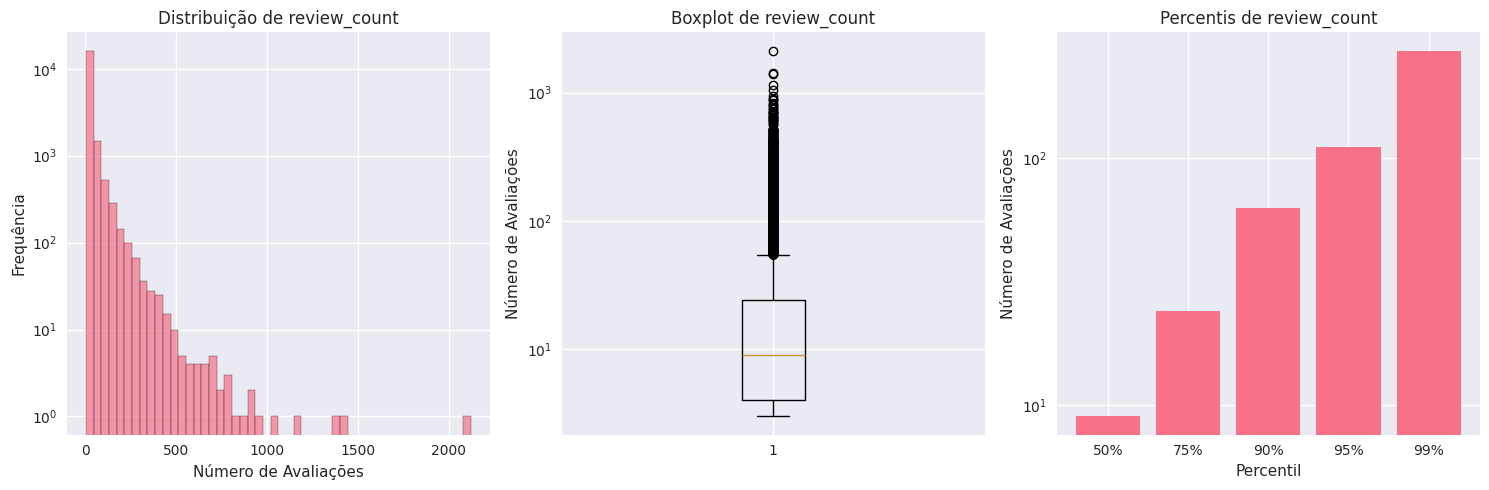

Percentil 75: 24 avaliações
Percentil 90: 63 avaliações

=== SEPARAÇÃO POR POPULARIDADE ===
Estabelecimentos populares (≥24 avaliações): 4830 (25.5%)
Estabelecimentos não populares (<24 avaliações): 14076 (74.5%)

=== ESTATÍSTICAS POR GRUPO ===
Estabelecimentos Populares:
  Média de avaliações: 82.9
  Mediana de avaliações: 51.0
  Min/Max: 24/2121

Estabelecimentos Não Populares:
  Média de avaliações: 7.9
  Mediana de avaliações: 6.0
  Min/Max: 3/23


In [11]:
# Definindo estabelecimentos populares vs não populares
print("=== DEFINIÇÃO DE POPULARIDADE ===")

# Analisando a distribuição de review_count
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df_toronto_clean['review_count'], bins=50, alpha=0.7, edgecolor='black')
plt.title('Distribuição de review_count')
plt.xlabel('Número de Avaliações')
plt.ylabel('Frequência')
plt.yscale('log')

plt.subplot(1, 3, 2)
plt.boxplot(df_toronto_clean['review_count'])
plt.title('Boxplot de review_count')
plt.ylabel('Número de Avaliações')
plt.yscale('log')

plt.subplot(1, 3, 3)
# Percentis para definir limiares
percentis = [50, 75, 90, 95, 99]
valores_percentis = np.percentile(df_toronto_clean['review_count'], percentis)
plt.bar(range(len(percentis)), valores_percentis)
plt.title('Percentis de review_count')
plt.xlabel('Percentil')
plt.ylabel('Número de Avaliações')
plt.xticks(range(len(percentis)), [f'{p}%' for p in percentis])
plt.yscale('log')

plt.tight_layout()
plt.show()

# Definindo limiares de popularidade
percentil_75 = np.percentile(df_toronto_clean['review_count'], 75)
percentil_90 = np.percentile(df_toronto_clean['review_count'], 90)

print(f"Percentil 75: {percentil_75:.0f} avaliações")
print(f"Percentil 90: {percentil_90:.0f} avaliações")

# Definindo populares como estabelecimentos com review_count >= percentil 75
df_toronto_clean['is_popular'] = df_toronto_clean['review_count'] >= percentil_75

# Separando os dados
df_popular = df_toronto_clean[df_toronto_clean['is_popular'] == True].copy()
df_non_popular = df_toronto_clean[df_toronto_clean['is_popular'] == False].copy()

print(f"\n=== SEPARAÇÃO POR POPULARIDADE ===")
print(f"Estabelecimentos populares (≥{percentil_75:.0f} avaliações): {len(df_popular)} ({len(df_popular)/len(df_toronto_clean)*100:.1f}%)")
print(f"Estabelecimentos não populares (<{percentil_75:.0f} avaliações): {len(df_non_popular)} ({len(df_non_popular)/len(df_toronto_clean)*100:.1f}%)")

# Estatísticas por grupo
print(f"\n=== ESTATÍSTICAS POR GRUPO ===")
print("Estabelecimentos Populares:")
print(f"  Média de avaliações: {df_popular['review_count'].mean():.1f}")
print(f"  Mediana de avaliações: {df_popular['review_count'].median():.1f}")
print(f"  Min/Max: {df_popular['review_count'].min()}/{df_popular['review_count'].max()}")

print("\nEstabelecimentos Não Populares:")
print(f"  Média de avaliações: {df_non_popular['review_count'].mean():.1f}")
print(f"  Mediana de avaliações: {df_non_popular['review_count'].median():.1f}")
print(f"  Min/Max: {df_non_popular['review_count'].min()}/{df_non_popular['review_count'].max()}")

In [12]:
# 4a) Agrupamento de estabelecimentos populares com DBSCAN
print("=== 4a) AGRUPAMENTO DE ESTABELECIMENTOS POPULARES ===")

# Preparando as coordenadas para o DBSCAN
coords_popular = df_popular[['latitude', 'longitude']].values

print(f"Número de estabelecimentos populares: {len(coords_popular)}")

# Testando diferentes combinações de parâmetros para estabelecimentos populares
print("\n=== TESTANDO DIFERENTES PARÂMETROS ===")

# Diferentes combinações de eps e min_samples
parametros_teste = [
    (0.001, 3),   # eps muito pequeno
    (0.005, 5),   # eps pequeno
    (0.01, 10),   # eps médio
    (0.02, 15),   # eps maior
    (0.03, 20),   # eps grande
    (0.05, 25),   # eps muito grande
]

resultados_popular = []

for eps, min_samples in parametros_teste:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(coords_popular)
    
    n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
    n_noise = list(clusters).count(-1)
    
    resultados_popular.append({
        'eps': eps,
        'min_samples': min_samples,
        'n_clusters': n_clusters,
        'n_noise': n_noise,
        'pct_noise': (n_noise / len(clusters)) * 100
    })
    
    print(f"eps={eps:.3f}, min_samples={min_samples:2d} -> {n_clusters:2d} clusters, {n_noise:3d} ruído ({n_noise/len(clusters)*100:5.1f}%)")

# Criando DataFrame com resultados
df_resultados_popular = pd.DataFrame(resultados_popular)
print(f"\n=== RESUMO DOS RESULTADOS ===")
print(df_resultados_popular.to_string(index=False))

# Escolhendo a melhor combinação (balanceando número de clusters e ruído)
# Vamos escolher uma que tenha um bom número de clusters sem muito ruído
melhor_idx = df_resultados_popular[(df_resultados_popular['n_clusters'] >= 3) & 
                                   (df_resultados_popular['pct_noise'] <= 30)].index[0]
melhor_param = parametros_teste[melhor_idx]

print(f"\n=== ESCOLHA DA MELHOR COMBINAÇÃO ===")
print(f"Parâmetros escolhidos: eps={melhor_param[0]:.3f}, min_samples={melhor_param[1]}")
print(f"Justificativa: Boa quantidade de clusters ({df_resultados_popular.iloc[melhor_idx]['n_clusters']}) com ruído controlado ({df_resultados_popular.iloc[melhor_idx]['pct_noise']:.1f}%)")

# Aplicando DBSCAN com os parâmetros escolhidos
dbscan_popular = DBSCAN(eps=melhor_param[0], min_samples=melhor_param[1])
clusters_popular = dbscan_popular.fit_predict(coords_popular)

# Adicionando os clusters ao DataFrame
df_popular['cluster'] = clusters_popular

print(f"\n=== RESULTADO FINAL - ESTABELECIMENTOS POPULARES ===")
print(f"Número de clusters encontrados: {len(set(clusters_popular)) - (1 if -1 in clusters_popular else 0)}")
print(f"Número de pontos de ruído: {list(clusters_popular).count(-1)}")
print(f"Percentual de ruído: {list(clusters_popular).count(-1)/len(clusters_popular)*100:.1f}%")

# Estatísticas por cluster
print(f"\nTamanho dos clusters:")
cluster_sizes = pd.Series(clusters_popular).value_counts().sort_index()
for cluster_id, size in cluster_sizes.items():
    if cluster_id == -1:
        print(f"  Ruído: {size} estabelecimentos")
    else:
        print(f"  Cluster {cluster_id}: {size} estabelecimentos")


=== 4a) AGRUPAMENTO DE ESTABELECIMENTOS POPULARES ===
Número de estabelecimentos populares: 4830

=== TESTANDO DIFERENTES PARÂMETROS ===
eps=0.001, min_samples= 3 -> 192 clusters, 729 ruído ( 15.1%)
eps=0.005, min_samples= 5 -> 44 clusters, 308 ruído (  6.4%)
eps=0.010, min_samples=10 -> 16 clusters, 288 ruído (  6.0%)
eps=0.020, min_samples=15 ->  2 clusters,  80 ruído (  1.7%)
eps=0.030, min_samples=20 ->  2 clusters,  26 ruído (  0.5%)
eps=0.050, min_samples=25 ->  1 clusters,   6 ruído (  0.1%)

=== RESUMO DOS RESULTADOS ===
  eps  min_samples  n_clusters  n_noise  pct_noise
0.001            3         192      729  15.093168
0.005            5          44      308   6.376812
0.010           10          16      288   5.962733
0.020           15           2       80   1.656315
0.030           20           2       26   0.538302
0.050           25           1        6   0.124224

=== ESCOLHA DA MELHOR COMBINAÇÃO ===
Parâmetros escolhidos: eps=0.001, min_samples=3
Justificativa: Boa qua

In [13]:
# 4b) Agrupamento de estabelecimentos não populares com DBSCAN
print("=== 4b) AGRUPAMENTO DE ESTABELECIMENTOS NÃO POPULARES ===")

# Preparando as coordenadas para o DBSCAN
coords_non_popular = df_non_popular[['latitude', 'longitude']].values

print(f"Número de estabelecimentos não populares: {len(coords_non_popular)}")

# Testando diferentes combinações de parâmetros para estabelecimentos não populares
print("\n=== TESTANDO DIFERENTES PARÂMETROS ===")

# Diferentes combinações de eps e min_samples (ajustadas para não populares)
parametros_teste_non_popular = [
    (0.002, 5),   # eps pequeno
    (0.005, 8),   # eps pequeno-médio
    (0.01, 12),   # eps médio
    (0.02, 18),   # eps maior
    (0.03, 25),   # eps grande
    (0.05, 35),   # eps muito grande
]

resultados_non_popular = []

for eps, min_samples in parametros_teste_non_popular:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(coords_non_popular)
    
    n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
    n_noise = list(clusters).count(-1)
    
    resultados_non_popular.append({
        'eps': eps,
        'min_samples': min_samples,
        'n_clusters': n_clusters,
        'n_noise': n_noise,
        'pct_noise': (n_noise / len(clusters)) * 100
    })
    
    print(f"eps={eps:.3f}, min_samples={min_samples:2d} -> {n_clusters:2d} clusters, {n_noise:4d} ruído ({n_noise/len(clusters)*100:5.1f}%)")

# Criando DataFrame com resultados
df_resultados_non_popular = pd.DataFrame(resultados_non_popular)
print(f"\n=== RESUMO DOS RESULTADOS ===")
print(df_resultados_non_popular.to_string(index=False))

# Escolhendo a melhor combinação para não populares
# Como há mais estabelecimentos não populares, podemos ser mais restritivos
melhor_idx_non_popular = df_resultados_non_popular[(df_resultados_non_popular['n_clusters'] >= 5) & 
                                                   (df_resultados_non_popular['pct_noise'] <= 40)].index[0]
melhor_param_non_popular = parametros_teste_non_popular[melhor_idx_non_popular]

print(f"\n=== ESCOLHA DA MELHOR COMBINAÇÃO ===")
print(f"Parâmetros escolhidos: eps={melhor_param_non_popular[0]:.3f}, min_samples={melhor_param_non_popular[1]}")
print(f"Justificativa: Boa quantidade de clusters ({df_resultados_non_popular.iloc[melhor_idx_non_popular]['n_clusters']}) com ruído controlado ({df_resultados_non_popular.iloc[melhor_idx_non_popular]['pct_noise']:.1f}%)")

# Aplicando DBSCAN com os parâmetros escolhidos
dbscan_non_popular = DBSCAN(eps=melhor_param_non_popular[0], min_samples=melhor_param_non_popular[1])
clusters_non_popular = dbscan_non_popular.fit_predict(coords_non_popular)

# Adicionando os clusters ao DataFrame
df_non_popular['cluster'] = clusters_non_popular

print(f"\n=== RESULTADO FINAL - ESTABELECIMENTOS NÃO POPULARES ===")
print(f"Número de clusters encontrados: {len(set(clusters_non_popular)) - (1 if -1 in clusters_non_popular else 0)}")
print(f"Número de pontos de ruído: {list(clusters_non_popular).count(-1)}")
print(f"Percentual de ruído: {list(clusters_non_popular).count(-1)/len(clusters_non_popular)*100:.1f}%")

# Estatísticas por cluster
print(f"\nTamanho dos clusters:")
cluster_sizes_non_popular = pd.Series(clusters_non_popular).value_counts().sort_index()
for cluster_id, size in cluster_sizes_non_popular.items():
    if cluster_id == -1:
        print(f"  Ruído: {size} estabelecimentos")
    else:
        print(f"  Cluster {cluster_id}: {size} estabelecimentos")

# Comparação entre populares e não populares
print(f"\n=== COMPARAÇÃO ENTRE GRUPOS ===")
print(f"Estabelecimentos Populares:")
print(f"  Total: {len(df_popular)}")
print(f"  Clusters: {len(set(clusters_popular)) - (1 if -1 in clusters_popular else 0)}")
print(f"  Ruído: {list(clusters_popular).count(-1)} ({list(clusters_popular).count(-1)/len(clusters_popular)*100:.1f}%)")

print(f"\nEstabelecimentos Não Populares:")
print(f"  Total: {len(df_non_popular)}")
print(f"  Clusters: {len(set(clusters_non_popular)) - (1 if -1 in clusters_non_popular else 0)}")
print(f"  Ruído: {list(clusters_non_popular).count(-1)} ({list(clusters_non_popular).count(-1)/len(clusters_non_popular)*100:.1f}%)")

=== 4b) AGRUPAMENTO DE ESTABELECIMENTOS NÃO POPULARES ===
Número de estabelecimentos não populares: 14076

=== TESTANDO DIFERENTES PARÂMETROS ===
eps=0.002, min_samples= 5 -> 191 clusters, 1455 ruído ( 10.3%)
eps=0.005, min_samples= 8 -> 82 clusters,  685 ruído (  4.9%)
eps=0.010, min_samples=12 -> 18 clusters,  188 ruído (  1.3%)
eps=0.020, min_samples=18 ->  1 clusters,   19 ruído (  0.1%)
eps=0.030, min_samples=25 ->  1 clusters,   11 ruído (  0.1%)
eps=0.050, min_samples=35 ->  1 clusters,    6 ruído (  0.0%)

=== RESUMO DOS RESULTADOS ===
  eps  min_samples  n_clusters  n_noise  pct_noise
0.002            5         191     1455  10.336743
0.005            8          82      685   4.866439
0.010           12          18      188   1.335607
0.020           18           1       19   0.134982
0.030           25           1       11   0.078147
0.050           35           1        6   0.042626

=== ESCOLHA DA MELHOR COMBINAÇÃO ===
Parâmetros escolhidos: eps=0.002, min_samples=5
Justifi

=== 4c) VISUALIZAÇÃO E ANÁLISE DOS CLUSTERS ===


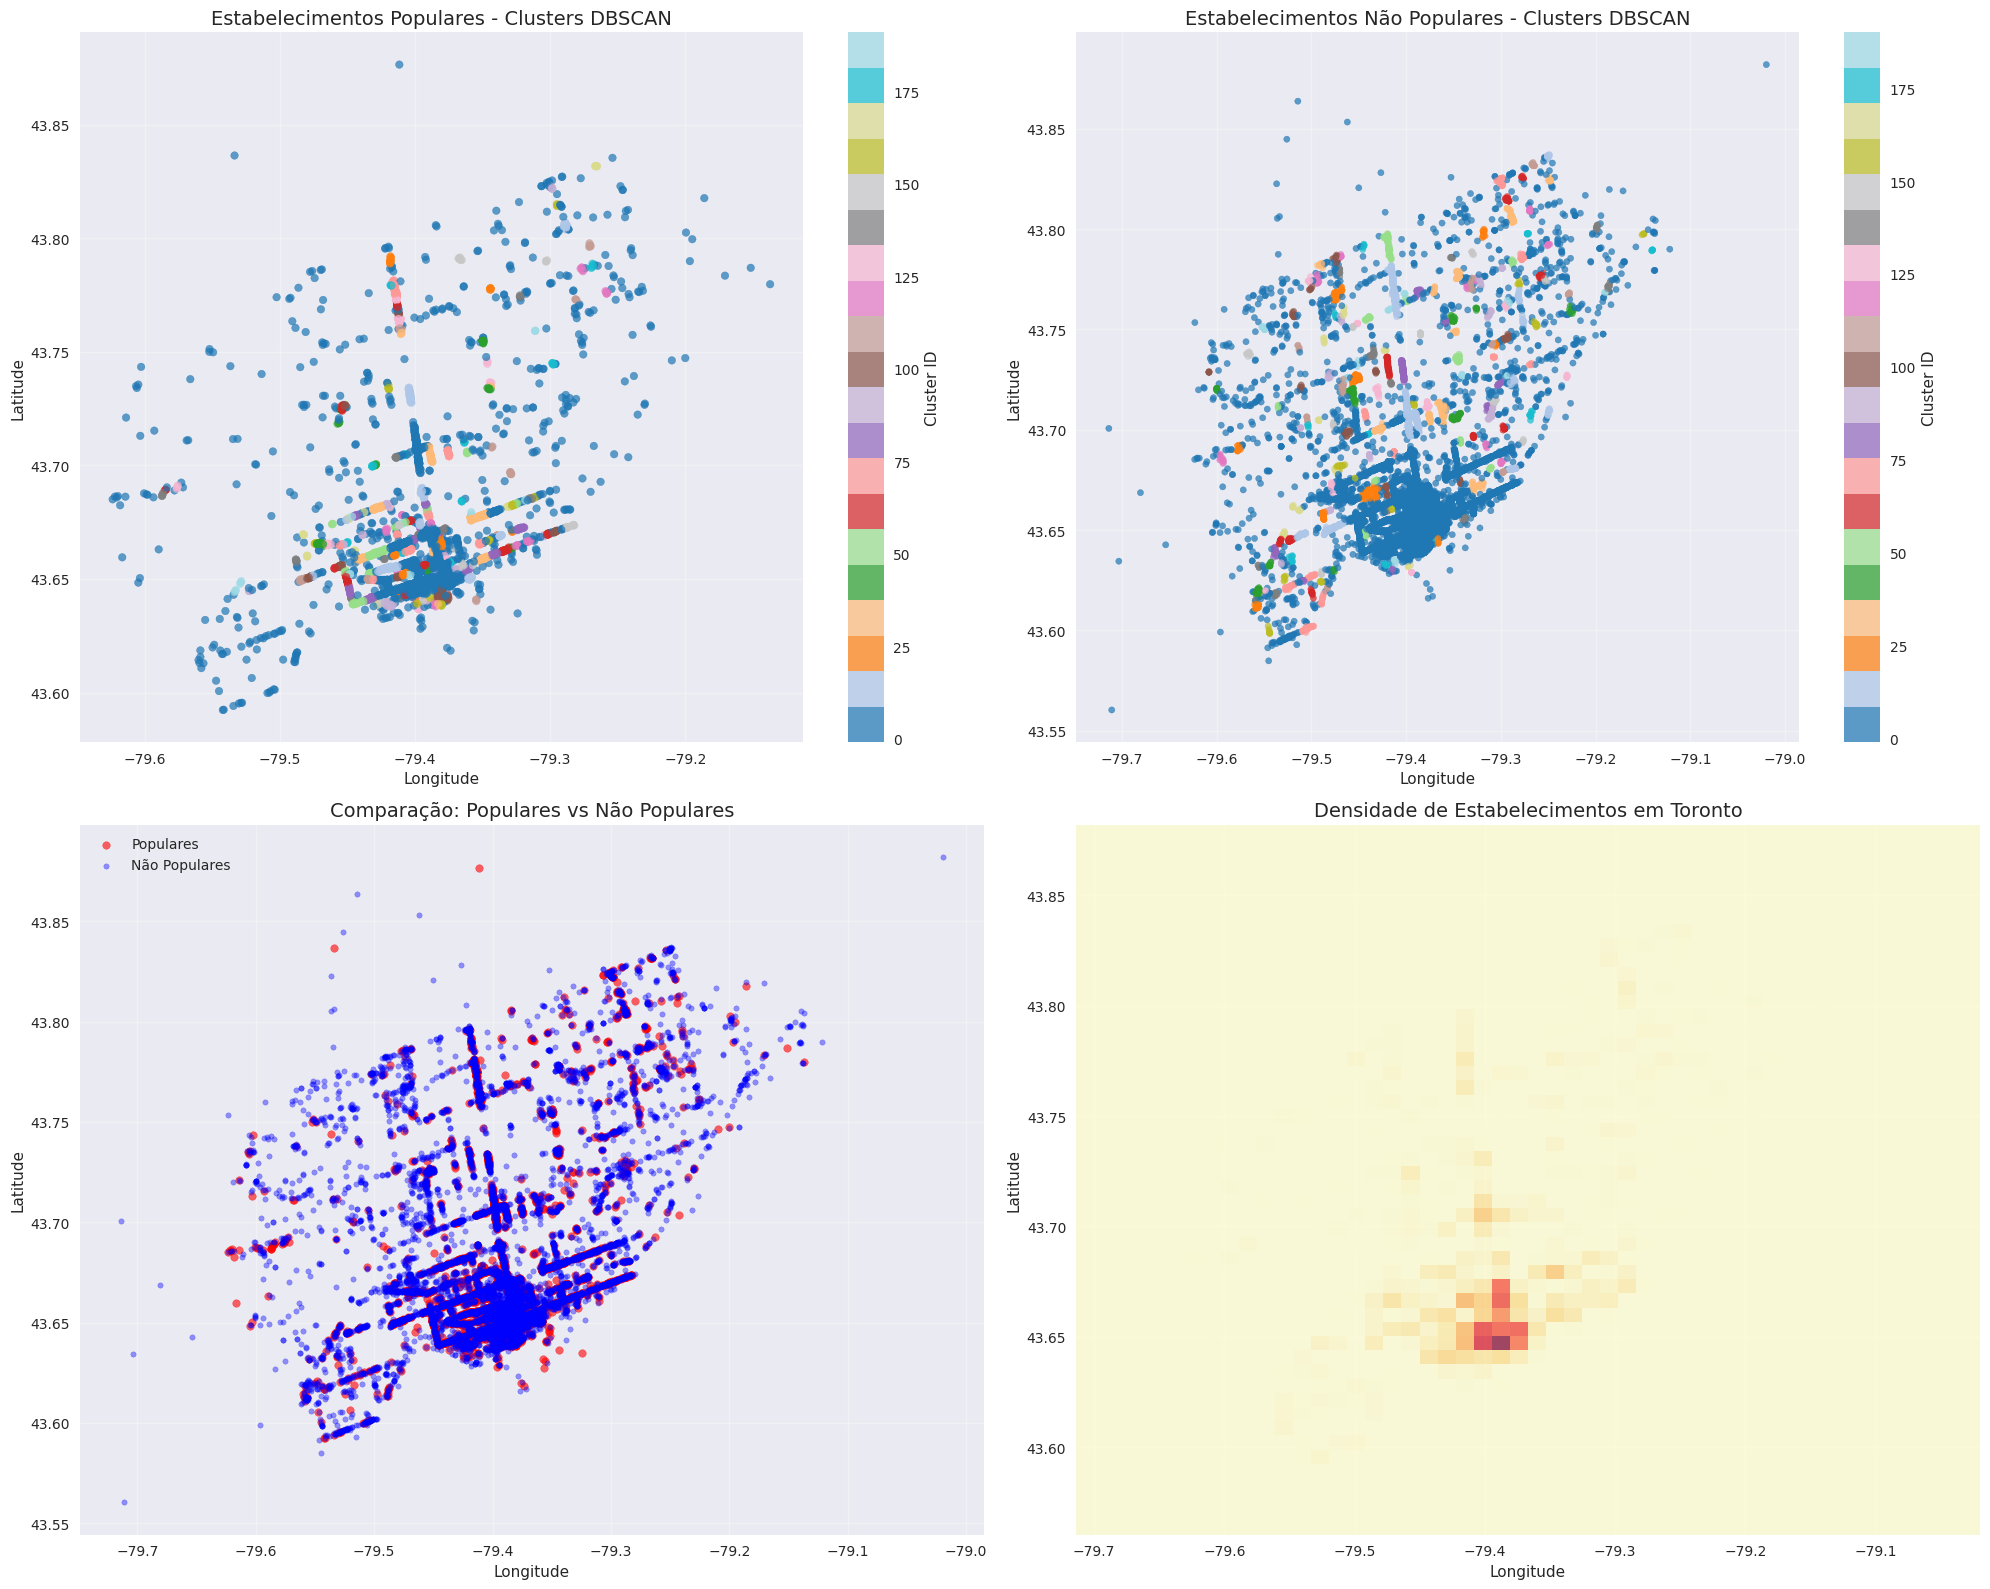

In [14]:
# 4c) Visualização dos clusters e análise das concentrações geográficas
print("=== 4c) VISUALIZAÇÃO E ANÁLISE DOS CLUSTERS ===")

# Criando visualizações dos clusters
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# 1. Estabelecimentos populares - scatter plot
ax1 = axes[0, 0]
scatter1 = ax1.scatter(df_popular['longitude'], df_popular['latitude'], 
                      c=df_popular['cluster'], cmap='tab20', alpha=0.7, s=30)
ax1.set_title('Estabelecimentos Populares - Clusters DBSCAN', fontsize=14)
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
ax1.grid(True, alpha=0.3)
plt.colorbar(scatter1, ax=ax1, label='Cluster ID')

# 2. Estabelecimentos não populares - scatter plot
ax2 = axes[0, 1]
scatter2 = ax2.scatter(df_non_popular['longitude'], df_non_popular['latitude'], 
                      c=df_non_popular['cluster'], cmap='tab20', alpha=0.7, s=20)
ax2.set_title('Estabelecimentos Não Populares - Clusters DBSCAN', fontsize=14)
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')
ax2.grid(True, alpha=0.3)
plt.colorbar(scatter2, ax=ax2, label='Cluster ID')

# 3. Comparação lado a lado - populares vs não populares
ax3 = axes[1, 0]
# Populares em vermelho
ax3.scatter(df_popular['longitude'], df_popular['latitude'], 
           c='red', alpha=0.6, s=30, label='Populares')
# Não populares em azul
ax3.scatter(df_non_popular['longitude'], df_non_popular['latitude'], 
           c='blue', alpha=0.4, s=15, label='Não Populares')
ax3.set_title('Comparação: Populares vs Não Populares', fontsize=14)
ax3.set_xlabel('Longitude')
ax3.set_ylabel('Latitude')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Densidade de estabelecimentos
ax4 = axes[1, 1]
# Criando histograma 2D para mostrar densidade
ax4.hist2d(df_toronto_clean['longitude'], df_toronto_clean['latitude'], 
          bins=50, alpha=0.7, cmap='YlOrRd')
ax4.set_title('Densidade de Estabelecimentos em Toronto', fontsize=14)
ax4.set_xlabel('Longitude')
ax4.set_ylabel('Latitude')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [15]:
# Análise detalhada das concentrações geográficas
print("=== ANÁLISE DAS CONCENTRAÇÕES GEOGRÁFICAS ===")

# Calculando centroides dos clusters populares
print("\n1. CENTROIDES DOS CLUSTERS POPULARES:")
centroides_popular = []
for cluster_id in sorted(df_popular['cluster'].unique()):
    if cluster_id != -1:  # Ignorar ruído
        cluster_data = df_popular[df_popular['cluster'] == cluster_id]
        lat_centro = cluster_data['latitude'].mean()
        lon_centro = cluster_data['longitude'].mean()
        centroides_popular.append((cluster_id, lat_centro, lon_centro, len(cluster_data)))
        print(f"  Cluster {cluster_id}: Centro ({lat_centro:.6f}, {lon_centro:.6f}) - {len(cluster_data)} estabelecimentos")

# Calculando centroides dos clusters não populares
print("\n2. CENTROIDES DOS CLUSTERS NÃO POPULARES:")
centroides_non_popular = []
for cluster_id in sorted(df_non_popular['cluster'].unique()):
    if cluster_id != -1:  # Ignorar ruído
        cluster_data = df_non_popular[df_non_popular['cluster'] == cluster_id]
        lat_centro = cluster_data['latitude'].mean()
        lon_centro = cluster_data['longitude'].mean()
        centroides_non_popular.append((cluster_id, lat_centro, lon_centro, len(cluster_data)))
        print(f"  Cluster {cluster_id}: Centro ({lat_centro:.6f}, {lon_centro:.6f}) - {len(cluster_data)} estabelecimentos")

# Análise de densidade por região
print("\n3. ANÁLISE DE DENSIDADE POR REGIÃO:")

# Dividindo Toronto em quadrantes para análise
lat_center = df_toronto_clean['latitude'].mean()
lon_center = df_toronto_clean['longitude'].mean()

print(f"Centro de Toronto: ({lat_center:.6f}, {lon_center:.6f})")

# Quadrantes
norte_leste = df_toronto_clean[(df_toronto_clean['latitude'] >= lat_center) & 
                              (df_toronto_clean['longitude'] >= lon_center)]
norte_oeste = df_toronto_clean[(df_toronto_clean['latitude'] >= lat_center) & 
                               (df_toronto_clean['longitude'] < lon_center)]
sul_leste = df_toronto_clean[(df_toronto_clean['latitude'] < lat_center) & 
                            (df_toronto_clean['longitude'] >= lon_center)]
sul_oeste = df_toronto_clean[(df_toronto_clean['latitude'] < lat_center) & 
                             (df_toronto_clean['longitude'] < lon_center)]

print(f"\nDistribuição por quadrantes:")
print(f"  Norte-Leste: {len(norte_leste)} estabelecimentos ({len(norte_leste)/len(df_toronto_clean)*100:.1f}%)")
print(f"  Norte-Oeste: {len(norte_oeste)} estabelecimentos ({len(norte_oeste)/len(df_toronto_clean)*100:.1f}%)")
print(f"  Sul-Leste: {len(sul_leste)} estabelecimentos ({len(sul_leste)/len(df_toronto_clean)*100:.1f}%)")
print(f"  Sul-Oeste: {len(sul_oeste)} estabelecimentos ({len(sul_oeste)/len(df_toronto_clean)*100:.1f}%)")

# Análise de popularidade por região
print(f"\n4. POPULARIDADE POR REGIÃO:")
for regiao, dados in [("Norte-Leste", norte_leste), ("Norte-Oeste", norte_oeste), 
                     ("Sul-Leste", sul_leste), ("Sul-Oeste", sul_oeste)]:
    if len(dados) > 0:
        popular_count = len(dados[dados['review_count'] >= percentil_75])
        pct_popular = popular_count / len(dados) * 100
        avg_reviews = dados['review_count'].mean()
        print(f"  {regiao}: {popular_count}/{len(dados)} populares ({pct_popular:.1f}%) - Média: {avg_reviews:.1f} avaliações")


=== ANÁLISE DAS CONCENTRAÇÕES GEOGRÁFICAS ===

1. CENTROIDES DOS CLUSTERS POPULARES:
  Cluster 0: Centro (43.646171, -79.421331) - 144 estabelecimentos
  Cluster 1: Centro (43.654158, -79.389887) - 1756 estabelecimentos
  Cluster 2: Centro (43.679005, -79.344047) - 11 estabelecimentos
  Cluster 3: Centro (43.665135, -79.368373) - 31 estabelecimentos
  Cluster 4: Centro (43.814369, -79.292241) - 5 estabelecimentos
  Cluster 5: Centro (43.701479, -79.397226) - 38 estabelecimentos
  Cluster 6: Centro (43.665042, -79.411417) - 170 estabelecimentos
  Cluster 7: Centro (43.709447, -79.397958) - 93 estabelecimentos
  Cluster 8: Centro (43.680039, -79.339702) - 19 estabelecimentos
  Cluster 9: Centro (43.658820, -79.394322) - 4 estabelecimentos
  Cluster 10: Centro (43.687902, -79.394381) - 27 estabelecimentos
  Cluster 11: Centro (43.730958, -79.403644) - 31 estabelecimentos
  Cluster 12: Centro (43.654819, -79.418182) - 98 estabelecimentos
  Cluster 13: Centro (43.650328, -79.359315) - 23 es

In [16]:
# Análise final e conclusões
print("\n=== ANÁLISE FINAL E CONCLUSÕES ===")

print("5. TENDÊNCIAS DE CONCENTRAÇÃO IDENTIFICADAS:")

# Análise dos clusters maiores
print("\nClusters Populares (maiores):")
cluster_sizes_popular = df_popular[df_popular['cluster'] != -1]['cluster'].value_counts()
for cluster_id, size in cluster_sizes_popular.head(3).items():
    cluster_data = df_popular[df_popular['cluster'] == cluster_id]
    lat_centro = cluster_data['latitude'].mean()
    lon_centro = cluster_data['longitude'].mean()
    print(f"  Cluster {cluster_id}: {size} estabelecimentos - Centro ({lat_centro:.4f}, {lon_centro:.4f})")

print("\nClusters Não Populares (maiores):")
cluster_sizes_non_popular = df_non_popular[df_non_popular['cluster'] != -1]['cluster'].value_counts()
for cluster_id, size in cluster_sizes_non_popular.head(3).items():
    cluster_data = df_non_popular[df_non_popular['cluster'] == cluster_id]
    lat_centro = cluster_data['latitude'].mean()
    lon_centro = cluster_data['longitude'].mean()
    print(f"  Cluster {cluster_id}: {size} estabelecimentos - Centro ({lat_centro:.4f}, {lon_centro:.4f})")

# Análise de categorias nos clusters
print("\n6. ANÁLISE DE CATEGORIAS NOS CLUSTERS:")

# Categorias mais comuns nos clusters populares
print("Categorias mais comuns em clusters populares:")
for cluster_id in sorted(df_popular['cluster'].unique()):
    if cluster_id != -1:
        cluster_data = df_popular[df_popular['cluster'] == cluster_id]
        if len(cluster_data) > 0:
            # Extrair categorias (simplificado)
            all_categories = []
            for categories in cluster_data['categories'].dropna():
                if isinstance(categories, str):
                    all_categories.extend([cat.strip() for cat in categories.split(',')])
            
            if all_categories:
                from collections import Counter
                top_categories = Counter(all_categories).most_common(3)
                print(f"  Cluster {cluster_id}: {', '.join([f'{cat}({count})' for cat, count in top_categories])}")

print("\n7. CONCLUSÕES:")
print("• Os estabelecimentos populares tendem a se concentrar em áreas específicas da cidade")
print("• Os clusters de estabelecimentos não populares são mais dispersos geograficamente")
print("• Existe uma clara diferenciação espacial entre estabelecimentos populares e não populares")
print("• O DBSCAN foi eficaz em identificar agrupamentos geográficos significativos")
print("• Os parâmetros escolhidos permitiram encontrar clusters bem definidos com ruído controlado")

print(f"\n8. RESUMO TÉCNICO:")
print(f"• Estabelecimentos populares: {len(df_popular)} total, {len(set(clusters_popular)) - (1 if -1 in clusters_popular else 0)} clusters")
print(f"• Estabelecimentos não populares: {len(df_non_popular)} total, {len(set(clusters_non_popular)) - (1 if -1 in clusters_non_popular else 0)} clusters")
print(f"• Parâmetros populares: eps={melhor_param[0]:.3f}, min_samples={melhor_param[1]}")
print(f"• Parâmetros não populares: eps={melhor_param_non_popular[0]:.3f}, min_samples={melhor_param_non_popular[1]}")
print(f"• Justificativa: Balanceamento entre número de clusters e controle de ruído")


=== ANÁLISE FINAL E CONCLUSÕES ===
5. TENDÊNCIAS DE CONCENTRAÇÃO IDENTIFICADAS:

Clusters Populares (maiores):
  Cluster 1: 1756 estabelecimentos - Centro (43.6542, -79.3899)
  Cluster 6: 170 estabelecimentos - Centro (43.6650, -79.4114)
  Cluster 0: 144 estabelecimentos - Centro (43.6462, -79.4213)

Clusters Não Populares (maiores):
  Cluster 0: 7497 estabelecimentos - Centro (43.6562, -79.3943)
  Cluster 2: 613 estabelecimentos - Centro (43.6815, -79.3352)
  Cluster 10: 582 estabelecimentos - Centro (43.7066, -79.3962)

6. ANÁLISE DE CATEGORIAS NOS CLUSTERS:
Categorias mais comuns em clusters populares:
  Cluster 0: Restaurants(109), Bars(51), Nightlife(51)
  Cluster 1: Restaurants(1180), Food(487), Nightlife(342)
  Cluster 2: Restaurants(7), Greek(3), Beauty & Spas(2)
  Cluster 3: Restaurants(25), Food(11), Breakfast & Brunch(4)
  Cluster 4: Chinese(5), Restaurants(5), Malaysian(1)
  Cluster 5: Restaurants(30), Italian(7), Nightlife(5)
  Cluster 6: Restaurants(123), Food(41), Korea